## Installing pvlib-python
- create virtual enviroment & install pylib (details can be found at https://pvlib-python.readthedocs.io/en/stable/api.html)

**conda create -n pvlib -c conda-forge pvlib-python; conda activate pvlib**

- install pre-requisite

**pip install siphon**

**conda install netCDF4**

- install jupyter-notebook
**anaconda-navigator**

**--> check virtual environmnent and install jupyter-notebook**




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# import pvlib forecast models
from pvlib.forecast import GFS, NAM, NDFD, HRRR, RAP

/home/adun6414/Downloads/anaconda3/envs/pvlib/lib/python3.8/site-packages/pvlib/forecast.py:18: UserWarning: The forecast module algorithms and features are highly experimental. The API may change, the functionality may be consolidated into an io module, or the module may be separated into its own package.
  warnings.warn(


In [2]:
# specify location (Tucson, AZ)
latitude, longitude, tz = 32.2, -110.9, 'US/Arizona'

# specify time range.
start = pd.Timestamp(datetime.datetime.now(), tz=tz)
end = start + pd.Timedelta(days=7)
irrad_vars = ['ghi', 'dni', 'dhi']

### HRRR 
The High Resolution Rapid Refresh (HRRR) model is perhaps the most accurate model, however, it is only available for ~15 hours. It is updated every hour and runs at 3 km resolution. The HRRR excels in severe weather situations. See the NOAA ESRL HRRR page for more information. Use the HRRR, among others, if you want forecasts for less than 24 hours. The HRRR model covers the continental United States. (source: https://pvlib-python.readthedocs.io/en/v0.6.0/forecasts.html)

In [5]:
model = HRRR()

In [6]:
# specify time range.
start = pd.Timestamp(datetime.datetime.utcnow(), tz='UTC')
end = start + pd.Timedelta(days=2)
print(start)

data = model.get_processed_data(latitude, longitude, start, end)
data.index = data.index.tz_convert(tz)
data

2020-06-23 03:56:37.779613+00:00


,temp_air,wind_speed,ghi,dni,dhi,total_clouds,low_clouds,mid_clouds,high_clouds
2020-06-22 21:00:00-07:00,30.659485,2.114985,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2020-06-22 22:00:00-07:00,29.044098,2.885464,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2020-06-22 23:00:00-07:00,27.586334,2.674675,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2020-06-23 00:00:00-07:00,25.891296,0.401417,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2020-06-23 01:00:00-07:00,24.911865,1.030621,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2020-06-23 02:00:00-07:00,24.060333,2.073822,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2020-06-23 03:00:00-07:00,23.269379,2.191927,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2020-06-23 04:00:00-07:00,22.210968,1.753577,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2020-06-23 05:00:00-07:00,20.931580,1.638477,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2020-06-23 06:00:00-07:00,21.084747,1.940564,59.792298,151.496325,41.014040,0.0,0.0,0.0,0.0


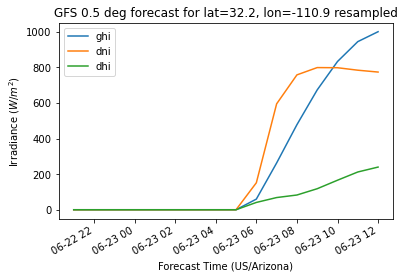

In [9]:
data[irrad_vars].plot()
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('GFS 0.5 deg forecast for lat={}, lon={} resampled'.format(latitude, longitude));
plt.legend();

In [12]:
import requests
import json
import dateutil.parser
import numpy as np

uri='https://api.weather.gov/points/40.42,-86.91/forecast/hourly'
RR = requests.get(uri)
T=RR.json()['properties']['periods']

In [17]:
TF=np.zeros((len(T),1))
HR=np.zeros((len(T),1))
for i in range(0,len(T)):
    TF[i]=T[i]['temperature']
# assumption: the prediction is hourly updating << checked 
#https://coderstoolbox.net/unixtimestamp/
HR=np.arange(0,len(T),1) # reference current time (hr)


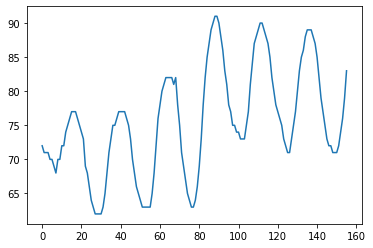

In [18]:
plt.plot(HR,TF)